# The Water
### Water Features Section

In this section we will measure the liters of water in each neighborhood's water features.

First, let's import the packages we need and our Water Features dataset.

In [4]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

In [5]:
features = pd.read_csv ("Water_Features.csv")
features.head()

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502


We need to condense this dataset into the information we need. For now, we're just going to see how many water features are in each neighborhood (or how many times the same neighborhood in mentioned in this dataset). There are several ways to do this, but I chose to use the "value_counts()" feature of a dataset to find the duplicate neighborhoods, then use a few conversions to organise that information into the dataframe below called "numFeat". 

In [6]:
Feat = pd.Series(features["neighborhood"].value_counts())
Feat = Feat.to_dict()
numFeat = pd.DataFrame(columns = ["Neighborhood", "Value"])
hood = Feat.keys()
count = Feat.values()
numFeat = pd.DataFrame({"Neighborhood":hood, "Value":count})
numFeat

,Neighborhood,Value
0,Squirrel Hill South,14
1,Highland Park,12
2,Bloomfield,8
3,Allegheny Center,8
4,Terrace Village,8
...,...,...
61,Stanton Heights,1
62,Strip District,1
63,Homewood West,1
64,Bon Air,1


Now we plot "numFeat" as a bar graph.

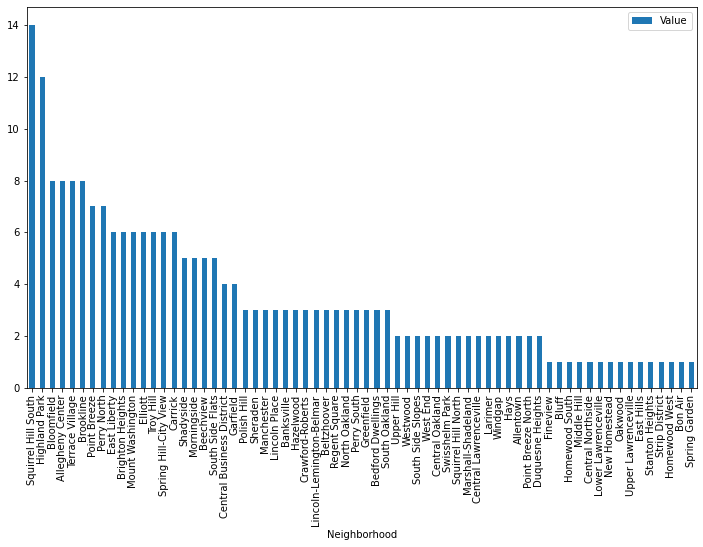

In [7]:
numFeat.plot.bar(rot=90, x='Neighborhood', y='Value', figsize=(12,7))

The bar graph above is a little difficult to read, so let's zoom in to the top ten neighborhoods--the neighborhoods with the most water features.

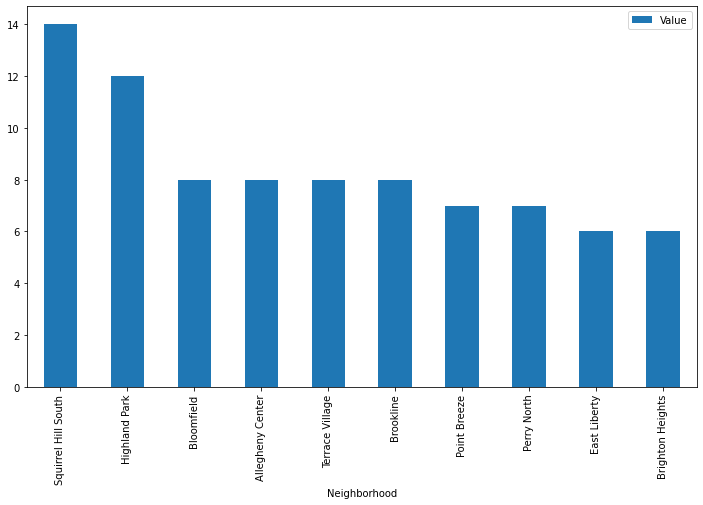

In [8]:
numTop = numFeat.head(10)
numTop.plot.bar(rot=90, x='Neighborhood', y='Value', figsize=(12,7))

Now let's import our map of Pittsburgh's neighborhoods.

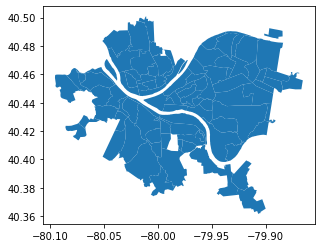

In [9]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

And merge our "numFeat" data with the map so that the darker red-orange a neighborhood is colored the more water features that neighborhood has.

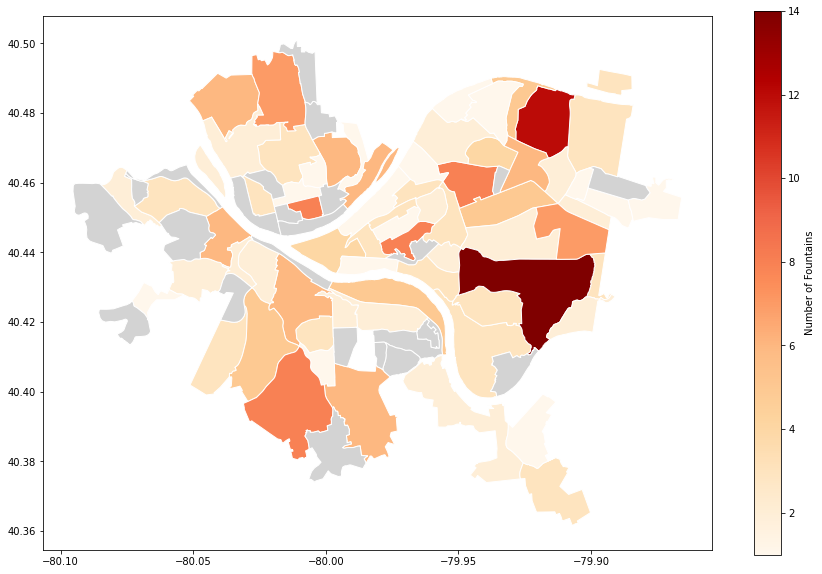

In [10]:
Feat_map = neighborhoods.merge(numFeat, how='left', left_on='hood', right_on='Neighborhood')
Feat_map.plot(column = "Value", cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Number of Fountains"}, 
               figsize=(15, 10), missing_kwds={"color": "lightgrey"})

According to this data, Squirrel Hill South wins for the most water features.

## But we're not done yet

This information only tells us how many fountains are in each neighborhood, but we can gleen more from this dataset. The dataset also tells us what type of fountains each neighborhood has (spray, drinking fountain, etc.). These fountains all hve different water capacities, so let's take that into account for our calculations.

In [11]:
neigh = features.loc[:,["neighborhood"]]
types = features.loc[:,["feature_type"]]
featType = pd.DataFrame()
featType["Neighborhood"] = neigh
featType["Type"] = types
featType

,Neighborhood,Type
0,Beechview,Drinking Fountain
1,Crawford-Roberts,Drinking Fountain
2,Allegheny Center,Drinking Fountain
3,Allegheny Center,Drinking Fountain
4,Allegheny Center,Drinking Fountain
...,...,...
227,Central Business District,Drinking Fountain
228,Mount Washington,Drinking Fountain
229,Perry South,Drinking Fountain
230,Allegheny Center,Spray


In [12]:
numTypes = types.value_counts()
numTypes

feature_type     
Drinking Fountain    196
Spray                 25
Decorative            11
dtype: int64

I found drinking fountains have an average capacity of 18.927 liters, but spary and decorative fountains are vague descriptions so for this purpose we'll esitmate a spray fountain to hold 50 liters and a decorative fountain to hold 100 liters.
* Drinking Fountain average: 18.927 liters
* Spray Fountain: 50 liters
* Decorative: 100 liters

Then we'll add these value for each type of fountain to the dataframe.

In [13]:
value = []
types = types.squeeze()
for row in types:
    if row == "Spray":
        value.append(50)
    elif row == "Decorative":
        value.append(100)
    else:
        value.append(18.927)
featType["Liters"] = value
featType = pd.DataFrame(featType)
featType

,Neighborhood,Type,Liters
0,Beechview,Drinking Fountain,18.927
1,Crawford-Roberts,Drinking Fountain,18.927
2,Allegheny Center,Drinking Fountain,18.927
3,Allegheny Center,Drinking Fountain,18.927
4,Allegheny Center,Drinking Fountain,18.927
...,...,...,...
227,Central Business District,Drinking Fountain,18.927
228,Mount Washington,Drinking Fountain,18.927
229,Perry South,Drinking Fountain,18.927
230,Allegheny Center,Spray,50.000


Here we add up all the liter of water in each neighborhood accroding to their fountains.

In [14]:
litersNeigh = featType.sort_values("Liters", ascending=False)

In [15]:
litersNeigh = litersNeigh.groupby("Neighborhood")["Liters"].sum()
litersNeigh = pd.DataFrame(litersNeigh)
litersNeigh = litersNeigh.sort_values("Liters", ascending=False)
litersNeigh

,Liters
Neighborhood,
Squirrel Hill South,427.124
Point Breeze,375.708
Allegheny Center,344.635
Highland Park,308.197
East Liberty,256.781
...,...
Homewood West,18.927
East Hills,18.927
Fineview,18.927


Looks like Squirrel Hill South again! Let's graph it.

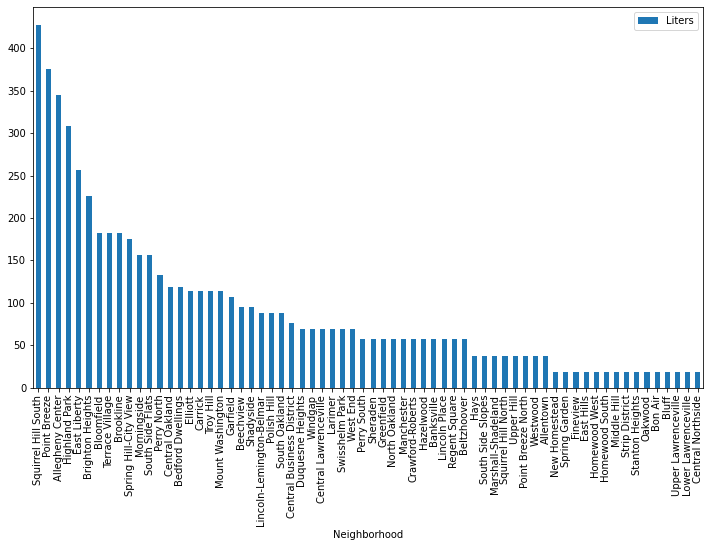

In [31]:
litersNeigh.plot.bar(rot=90, y='Liters', figsize=(12,7))

Now this is a much more informative graph. Let's look at the top ten neighborhoods.

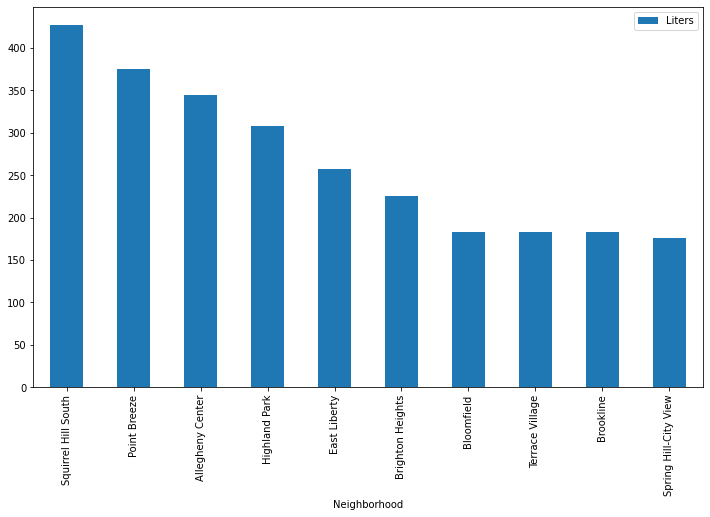

In [26]:
top_ten = litersNeigh.head(10)
top_ten.plot.bar(rot=90, y='Liters', figsize=(12,7))

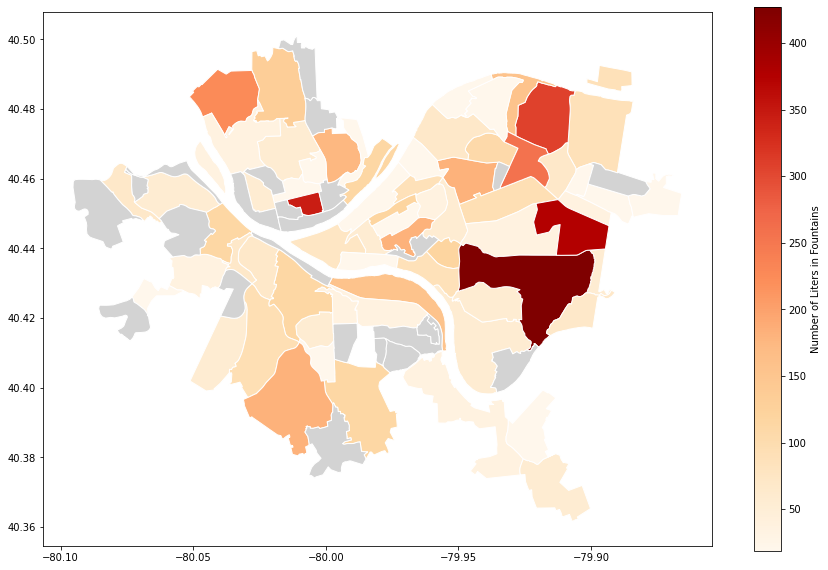

In [27]:
Liters_map = neighborhoods.merge(litersNeigh, how='left', left_on='hood', right_on='Neighborhood')
Liters_map.plot(column = "Liters", cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Number of Liters in Fountains"}, 
               figsize=(15, 10), missing_kwds={"color": "lightgrey"})

# Conclusion
The top five neighborhoods with the most water in water features are...

1: Squirrel Hill South: 427.124 liters

2: Point Breeze: 375.708 liters

3: Allegheny Center: 344.635 liters

4: Highland Park: 308.197 liters

5: East Liberty: 256.781 liters